<a href="https://colab.research.google.com/github/TSupattra/BADS7105_CRM/blob/main/03_Product%20Recommendation/Product_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mlxtend

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import data**

In [ ]:
import pandas as pd
df_n = pd.read_csv('/content/Prod_Rec.csv')

In [ ]:
missing = df_n.isnull().sum()
print(missing)

Timestamp                                  0
โปรแกรมแท้                                14
เครื่องซักผ้า                             14
NONE                                      12
รองเท้าวิ่ง                                0
ผักกรอบ                                    0
คอร์สเรียนเสริม                            0
nintendo switch                            0
BTC (Bitcoin)                              0
mechanical keyboard                        0
เครื่องดูดฝุ่น Dyson                       0
เคส ipad                                   0
คุณเคยซื้อโต๊ะปรับระดับหรือไม่             0
สินค้าจากพิมรี่พาย                         0
I PHONE 13                                 0
หูฟัง bluetooth (airpods,truewireless)     0
แก้วน้ำ Starbucks                          1
เบาะรองนั่ง                                0
เครื่องชงกาแฟแคปซูล                        0
ตั๋วเครื่องบินไปญี่ปุ่น                    0
Ebook                                      0
ตู้เย็น                                    0
กล้องฟิล์ม

**Clean data**

In [ ]:

df_n= df_n.fillna(0)
df_n.drop('NONE',axis='columns', inplace=True)
df_n = df_n.replace(['ไม่เคยซื้อ','ไม่เคย','ตัวเลือก 1'], 0)
df_n = df_n.replace(['เคย','เคยซื้อ'], 1)

print(df_n)



KeyError: ignored

##Rename Product

In [ ]:
rename_column = ['Timestamp', 'program', 'Washing machine', 'running shoes', 'crispy vegetables',
       'Additional courses', 'nintendo switch', 'BTC (Bitcoin)',
       'mechanical keyboard', 'Dyson vacuum cleaner ', 'ipad case',
       'adjustable table', '''Pimrypie's Product''', 'I PHONE 13',
       'bluetooth earphones(airpods,truewireless)', 'Starbucks glass',
       'seat cushion', 'capsule coffee machine', 'Airfare to Japan',
       'Ebook', 'refrigerator', 'film camera', 'musical instrument', 'whey protein',
       'Talisman ', 'dancing cactus', 'ROV Skin']

df_n = df_n.set_axis(rename_column, axis=1, inplace=False)
print(df_n)

           Timestamp  program  ...  dancing cactus  ROV Skin
0   10/28/2021 14:05        0  ...               0         0
1   10/28/2021 14:06        0  ...               0         1
2   10/28/2021 14:06        0  ...               0         0
3   10/28/2021 14:06        0  ...               0         0
4   10/28/2021 14:06        0  ...               0         0
5   10/28/2021 14:06        0  ...               0         1
6   10/28/2021 14:06        0  ...               0         0
7   10/28/2021 14:06        0  ...               0         1
8   10/28/2021 14:06        0  ...               0         0
9   10/28/2021 14:06        0  ...               0         0
10  10/28/2021 14:06        0  ...               0         0
11  10/28/2021 14:07        1  ...               0         0
12  10/28/2021 14:07        1  ...               0         0
13  10/28/2021 14:07        0  ...               0         0
14  10/28/2021 14:07        0  ...               0         0
15  10/28/2021 14:07    

In [ ]:

count_row = df_n.shape[0]
# print(count_row)
for i in range(count_row):
  # print(i)
  df_n.loc[[i]] = df_n.loc[[i]].replace(1, i+1)
  # print(df_n.loc[[i]])

# print(df_n)


In [ ]:
import pandas as pd
import numpy as np

# df_n = pd.read_csv('/content/Prod_Rec.csv')
df_columns = df_n.columns
# print(df_columns)
# df = df.pivot_table(index = df.index ,columns=df_columns,values=df_columns, aggfunc='first')
# print(df)
df_real = pd.DataFrame(columns=['Timestamp','value','Item'])
# print(df_real)
for i in df_columns:
    # print(i)
    df_2 = df_n.loc[:, ['Timestamp', i]]
    # print(df_2)
    df_2["Item"] = i
    # print(df_2)
    df_2 = df_2.rename(columns ={i:'value'})
    # print(df_2)
    if i == 'Timestamp':
        pass
    else:
        df_real = df_real.append(df_2,ignore_index = True)
    

df_real

,Timestamp,value,Item
0,10/28/2021 14:05,0,program
1,10/28/2021 14:06,0,program
2,10/28/2021 14:06,0,program
3,10/28/2021 14:06,0,program
4,10/28/2021 14:06,0,program
...,...,...,...
749,10/28/2021 14:08,0,ROV Skin
750,10/28/2021 14:08,0,ROV Skin
751,10/28/2021 14:08,27,ROV Skin
752,10/28/2021 14:08,28,ROV Skin


In [ ]:
df_real_drop_0 = df_real[df_real['value'] != 0].sort_values(by=['value'])

In [ ]:
df_real_drop_0.loc[df_real_drop_0["Item"]=='NONE'].shape[0]

df_real_drop_0 = df_real_drop_0[df_real_drop_0["Item"] != 'NONE']

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

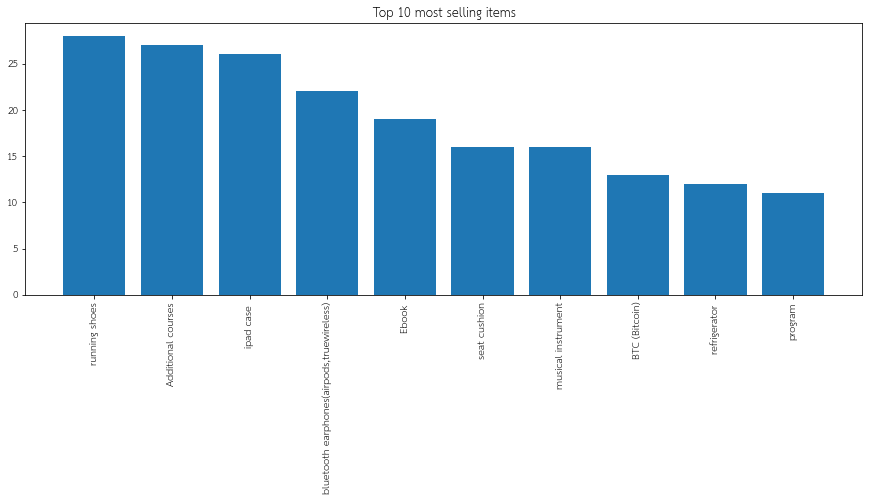

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


df_for_top10_Items=df_real_drop_0['Item'].value_counts().head(10)
Item_array= np.arange(len(df_for_top10_Items))

plt.figure(figsize=(15,5))
Items_name=['running shoes','Additional courses','ipad case ','bluetooth earphones(airpods,truewireless)','Ebook ','seat cushion','musical instrument','BTC (Bitcoin)','refrigerator ','program']
plt.bar(Item_array,df_for_top10_Items.iloc[:])
plt.xticks(Item_array,Items_name,rotation=90)
plt.title('Top 10 most selling items')
plt.show()

In [ ]:
hot_encoded_df=df_real_drop_0.groupby(['value','Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('value')

In [ ]:
hot_encoded_df.head(5)

Item,Additional courses,Airfare to Japan,BTC (Bitcoin),Dyson vacuum cleaner,Ebook,Pimrypie's Product,ROV Skin,Starbucks glass,Talisman,Washing machine,adjustable table,"bluetooth earphones(airpods,truewireless)",capsule coffee machine,crispy vegetables,dancing cactus,film camera,ipad case,mechanical keyboard,musical instrument,nintendo switch,program,refrigerator,running shoes,seat cushion,whey protein
value,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
5,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
hot_encoded_df = hot_encoded_df.applymap(encode_units)

In [ ]:
hot_encoded_df.head(5)

Item,Additional courses,Airfare to Japan,BTC (Bitcoin),Dyson vacuum cleaner,Ebook,Pimrypie's Product,ROV Skin,Starbucks glass,Talisman,Washing machine,adjustable table,"bluetooth earphones(airpods,truewireless)",capsule coffee machine,crispy vegetables,dancing cactus,film camera,ipad case,mechanical keyboard,musical instrument,nintendo switch,program,refrigerator,running shoes,seat cushion,whey protein
value,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
2,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,1,1
3,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0
4,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,1,0
5,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(hot_encoded_df, min_support=0.6, use_colnames=True)

In [ ]:
frequent_itemsets

,support,itemsets
0,0.931034,(Additional courses)
1,0.655172,(Ebook)
2,0.758621,"(bluetooth earphones(airpods,truewireless))"
3,0.896552,(ipad case)
4,0.965517,(running shoes)
5,0.620690,"(Ebook, Additional courses)"
6,0.689655,"(bluetooth earphones(airpods,truewireless), Ad..."
7,0.827586,"(ipad case, Additional courses)"
8,0.896552,"(running shoes, Additional courses)"
9,0.620690,"(ipad case, Ebook)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Ebook),(Additional courses),0.655172,0.931034,0.620690,0.947368,1.017544,0.010702,1.310345
1,(Additional courses),(Ebook),0.931034,0.655172,0.620690,0.666667,1.017544,0.010702,1.034483
2,(ipad case),(Ebook),0.896552,0.655172,0.620690,0.692308,1.056680,0.033294,1.120690
3,(Ebook),(ipad case),0.655172,0.896552,0.620690,0.947368,1.056680,0.033294,1.965517
4,(Ebook),(running shoes),0.655172,0.965517,0.655172,1.000000,1.035714,0.022592,inf


In [ ]:
rules = rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.8)]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Ebook),(Additional courses),0.655172,0.931034,0.620690,0.947368,1.017544,0.010702,1.310345
3,(Ebook),(ipad case),0.655172,0.896552,0.620690,0.947368,1.056680,0.033294,1.965517
4,(Ebook),(running shoes),0.655172,0.965517,0.655172,1.000000,1.035714,0.022592,inf
7,"(bluetooth earphones(airpods,truewireless))",(ipad case),0.758621,0.896552,0.689655,0.909091,1.013986,0.009512,1.137931
9,"(bluetooth earphones(airpods,truewireless))",(running shoes),0.758621,0.965517,0.758621,1.000000,1.035714,0.026159,inf
10,"(Ebook, running shoes)",(Additional courses),0.655172,0.931034,0.620690,0.947368,1.017544,0.010702,1.310345
11,"(Ebook, Additional courses)",(running shoes),0.620690,0.965517,0.620690,1.000000,1.035714,0.021403,inf
13,(Ebook),"(running shoes, Additional courses)",0.655172,0.896552,0.620690,0.947368,1.056680,0.033294,1.965517
16,"(bluetooth earphones(airpods,truewireless), Ad...",(ipad case),0.689655,0.896552,0.620690,0.900000,1.003846,0.002378,1.034483
19,"(bluetooth earphones(airpods,truewireless), Ad...",(running shoes),0.689655,0.965517,0.689655,1.000000,1.035714,0.023781,inf


In [ ]:
rules['length_antecedents'] = rules['antecedents'].apply(lambda x: len(x))
rules['length_consequents'] = rules['consequents'].apply(lambda x: len(x))
rules

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length_antecedents,length_consequents
0,(Ebook),(Additional courses),0.655172,0.931034,0.620690,0.947368,1.017544,0.010702,1.310345,1,1
3,(Ebook),(ipad case),0.655172,0.896552,0.620690,0.947368,1.056680,0.033294,1.965517,1,1
4,(Ebook),(running shoes),0.655172,0.965517,0.655172,1.000000,1.035714,0.022592,inf,1,1
7,"(bluetooth earphones(airpods,truewireless))",(ipad case),0.758621,0.896552,0.689655,0.909091,1.013986,0.009512,1.137931,1,1
9,"(bluetooth earphones(airpods,truewireless))",(running shoes),0.758621,0.965517,0.758621,1.000000,1.035714,0.026159,inf,1,1
10,"(Ebook, running shoes)",(Additional courses),0.655172,0.931034,0.620690,0.947368,1.017544,0.010702,1.310345,2,1
11,"(Ebook, Additional courses)",(running shoes),0.620690,0.965517,0.620690,1.000000,1.035714,0.021403,inf,2,1
13,(Ebook),"(running shoes, Additional courses)",0.655172,0.896552,0.620690,0.947368,1.056680,0.033294,1.965517,1,2
16,"(bluetooth earphones(airpods,truewireless), Ad...",(ipad case),0.689655,0.896552,0.620690,0.900000,1.003846,0.002378,1.034483,2,1
19,"(bluetooth earphones(airpods,truewireless), Ad...",(running shoes),0.689655,0.965517,0.689655,1.000000,1.035714,0.023781,inf,2,1


**Product Recommendation for 2 items**

In [ ]:
one_Items = rules[ (rules['length_antecedents'] == 1)&  (rules['length_consequents'] == 1)]
one_Items

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length_antecedents,length_consequents
0,(Ebook),(Additional courses),0.655172,0.931034,0.620690,0.947368,1.017544,0.010702,1.310345,1,1
3,(Ebook),(ipad case),0.655172,0.896552,0.620690,0.947368,1.056680,0.033294,1.965517,1,1
4,(Ebook),(running shoes),0.655172,0.965517,0.655172,1.000000,1.035714,0.022592,inf,1,1
7,"(bluetooth earphones(airpods,truewireless))",(ipad case),0.758621,0.896552,0.689655,0.909091,1.013986,0.009512,1.137931,1,1
9,"(bluetooth earphones(airpods,truewireless))",(running shoes),0.758621,0.965517,0.758621,1.000000,1.035714,0.026159,inf,1,1


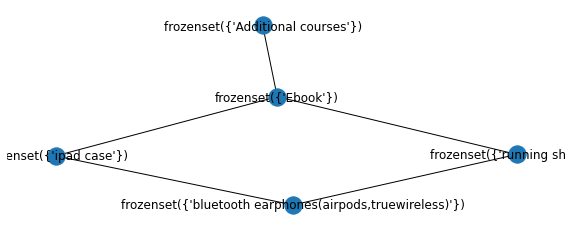

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(one_Items,source='antecedents',target='consequents')
pos = nx.circular_layout(GA)
fig, ax=plt.subplots(figsize=(10,4))
# nx.draw(GA, pos=pos, with_labels = True)
nx.draw(GA,with_labels=True)
plt.show()

**Product Recommendation for 3 items**

In [ ]:
Three_Items = rules[ ((rules['length_antecedents'] +rules['length_consequents'])  == 3)]
Three_Items

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length_antecedents,length_consequents
10,"(Ebook, running shoes)",(Additional courses),0.655172,0.931034,0.620690,0.947368,1.017544,0.010702,1.310345,2,1
11,"(Ebook, Additional courses)",(running shoes),0.620690,0.965517,0.620690,1.000000,1.035714,0.021403,inf,2,1
13,(Ebook),"(running shoes, Additional courses)",0.655172,0.896552,0.620690,0.947368,1.056680,0.033294,1.965517,1,2
16,"(bluetooth earphones(airpods,truewireless), Ad...",(ipad case),0.689655,0.896552,0.620690,0.900000,1.003846,0.002378,1.034483,2,1
19,"(bluetooth earphones(airpods,truewireless), Ad...",(running shoes),0.689655,0.965517,0.689655,1.000000,1.035714,0.023781,inf,2,1
21,"(bluetooth earphones(airpods,truewireless))","(running shoes, Additional courses)",0.758621,0.896552,0.689655,0.909091,1.013986,0.009512,1.137931,1,2
23,"(ipad case, Ebook)",(running shoes),0.620690,0.965517,0.620690,1.000000,1.035714,0.021403,inf,2,1
24,"(Ebook, running shoes)",(ipad case),0.655172,0.896552,0.620690,0.947368,1.056680,0.033294,1.965517,2,1
27,(Ebook),"(ipad case, running shoes)",0.655172,0.862069,0.620690,0.947368,1.098947,0.055886,2.620690,1,2
28,"(ipad case, running shoes)","(bluetooth earphones(airpods,truewireless))",0.862069,0.758621,0.689655,0.800000,1.054545,0.035672,1.206897,2,1


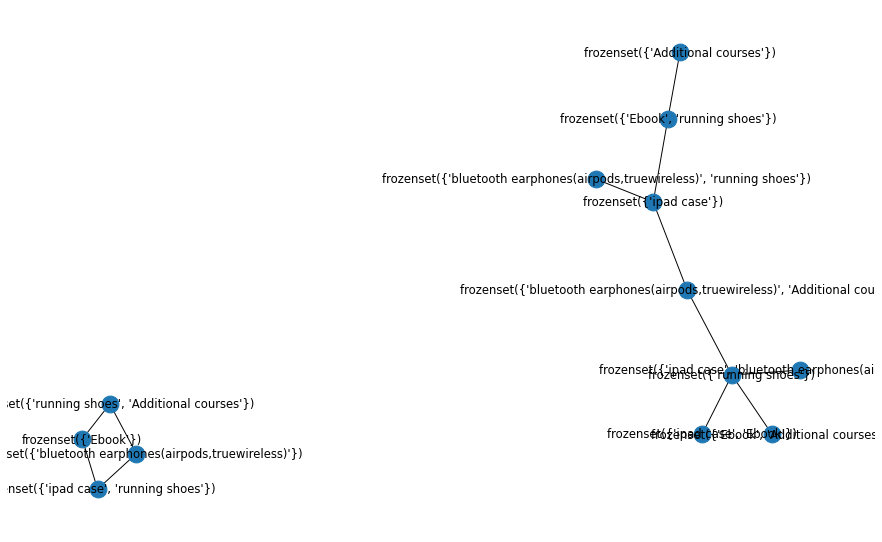

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(Three_Items,source='antecedents',target='consequents')
pos = nx.circular_layout(GA)
fig, ax=plt.subplots(figsize=(16,10),dpi=70)
# nx.draw(GA, pos=pos, with_labels = True)
nx.draw(GA,with_labels=True)
plt.show()

**Product Recommendation for 4 items**

In [ ]:
Four_Items = rules[ ((rules['length_antecedents'] +rules['length_consequents'])  == 4)]
Four_Items

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length_antecedents,length_consequents
35,"(ipad case, bluetooth earphones(airpods,truewi...",(running shoes),0.620690,0.965517,0.62069,1.000000,1.035714,0.021403,inf,3,1
36,"(bluetooth earphones(airpods,truewireless), ru...",(ipad case),0.689655,0.896552,0.62069,0.900000,1.003846,0.002378,1.034483,3,1
38,"(ipad case, bluetooth earphones(airpods,truewi...","(running shoes, Additional courses)",0.689655,0.896552,0.62069,0.900000,1.003846,0.002378,1.034483,2,2
40,"(bluetooth earphones(airpods,truewireless), Ad...","(ipad case, running shoes)",0.689655,0.862069,0.62069,0.900000,1.044000,0.026159,1.379310,2,2
43,"(bluetooth earphones(airpods,truewireless))","(ipad case, running shoes, Additional courses)",0.758621,0.793103,0.62069,0.818182,1.031621,0.019025,1.137931,1,3


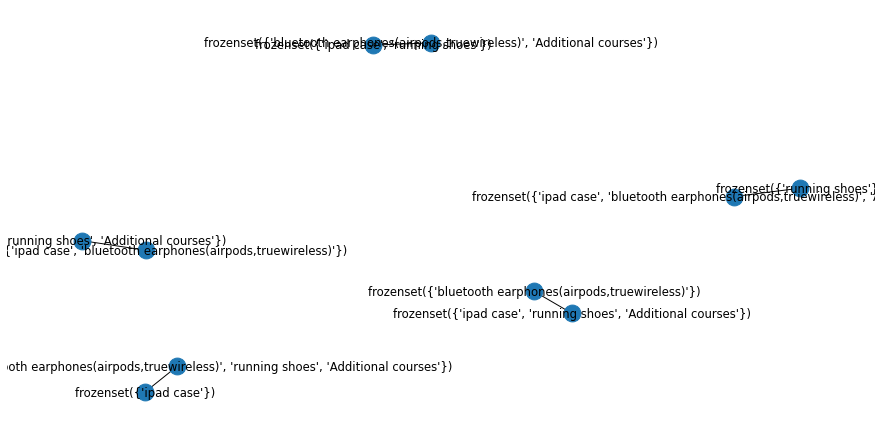

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(Four_Items,source='antecedents',target='consequents')
pos = nx.circular_layout(GA)
fig, ax=plt.subplots(figsize=(16,8),dpi=70)
# nx.draw(GA, pos=pos, with_labels = True)
nx.draw(GA,with_labels=True)
plt.show()

In [ ]:
item_item_matrix = pd.DataFrame(index=hot_encoded_df.columns,columns=hot_encoded_df.columns)

In [ ]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(hot_encoded_df.iloc[:,i],hot_encoded_df.iloc[:,j])

In [ ]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [ ]:
links

,item,related item,value
0,Additional courses,Additional courses,1
1,Additional courses,Airfare to Japan,0.57735
2,Additional courses,BTC (Bitcoin),0.587137
3,Additional courses,Dyson vacuum cleaner,0.272166
4,Additional courses,Ebook,0.794719
...,...,...,...
620,whey protein,program,0.369274
621,whey protein,refrigerator,0.353553
622,whey protein,running shoes,0.46291
623,whey protein,seat cushion,0.408248


In [ ]:
links_filtered=links.loc[ (links['value'] > 0.6) & 
                         (links['item'] != links['related item']) ]

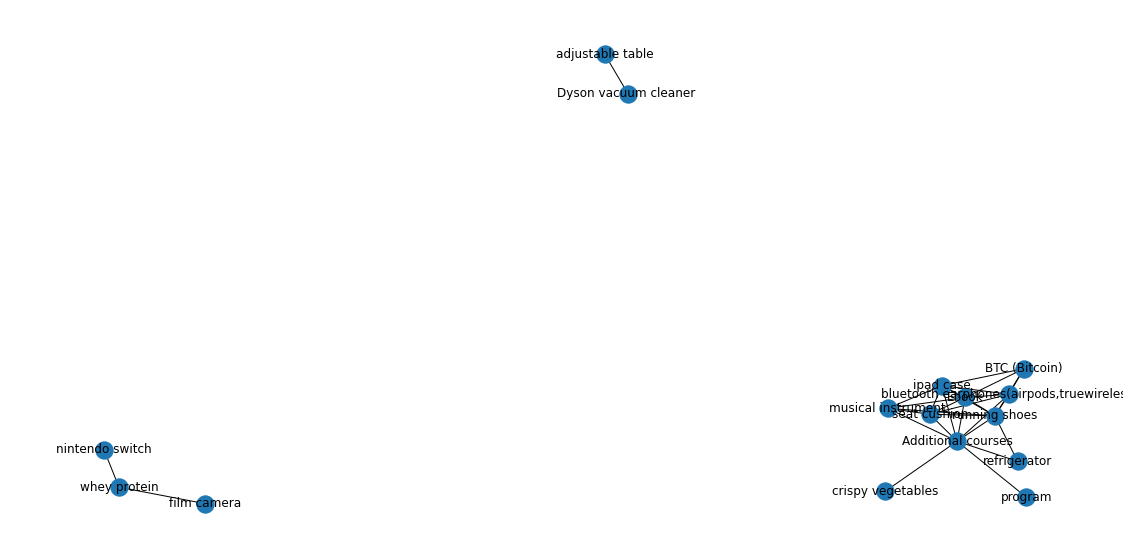

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(20,10))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA,with_labels=True)
plt.show()